In [17]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
from evaluate_model import evaluate_model, get_data, plot_accuracy, plot_loss
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
shape, classes, data = get_data()
train_data, val_data, test_data = data

Found 2392 files belonging to 2 classes.
Using 1914 files for training.
Found 2392 files belonging to 2 classes.
Using 478 files for validation.
Found 597 files belonging to 2 classes.


In [4]:
inputs = Input(shape= shape)
pretrained_EfficientNetV2B1_model = tf.keras.applications.EfficientNetV2B1(
    include_top=False,
    classes=len(classes),
    classifier_activation='softmax',
    include_preprocessing=True,
)
for layer in pretrained_EfficientNetV2B1_model.layers:
    layer.trainable = False
    layer1 = pretrained_EfficientNetV2B1_model(inputs)
    layer2 = Flatten()(layer1)
    layer3 = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(layer2)
    outputs = Dense(len(classes), activation='softmax')(layer3)
    EfficientNetV2B1_model = Model(inputs=inputs, outputs=outputs)

EfficientNetV2B1_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
EfficientNetV2B1_model.summary()

Model: "model_333"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetv2-b1 (Functio  (None, None, None, 1280   6931124   
 nal)                        )                                   
                                                                 
 flatten_333 (Flatten)       (None, 46080)             0         
                                                                 
 dense_666 (Dense)           (None, 16)                737296    
                                                                 
 dense_667 (Dense)           (None, 2)                 34        
                                                                 
Total params: 7668454 (29.25 MB)
Trainable params: 737330 (2.81 MB)
Non-trainable params: 6931124 (26.44 MB)
______________

In [11]:
EfficientNetV2B1_model_hist = EfficientNetV2B1_model.fit(
  train_data,
  validation_data=val_data,
  epochs=5
)

Epoch 1/5
60/60 [==============================] - 20s 333ms/step - loss: 0.0896 - accuracy: 0.9875 - val_loss: 0.1434 - val_accuracy: 0.9791
Epoch 2/5
60/60 [==============================] - 26s 421ms/step - loss: 0.1746 - accuracy: 0.9660 - val_loss: 0.1519 - val_accuracy: 0.9812
Epoch 3/5
60/60 [==============================] - 25s 415ms/step - loss: 0.1922 - accuracy: 0.9828 - val_loss: 0.1477 - val_accuracy: 0.9833
Epoch 4/5
60/60 [==============================] - 25s 420ms/step - loss: 0.1089 - accuracy: 0.9958 - val_loss: 0.0971 - val_accuracy: 0.9937
Epoch 5/5
60/60 [==============================] - 25s 419ms/step - loss: 0.0957 - accuracy: 0.9943 - val_loss: 0.0758 - val_accuracy: 0.9979


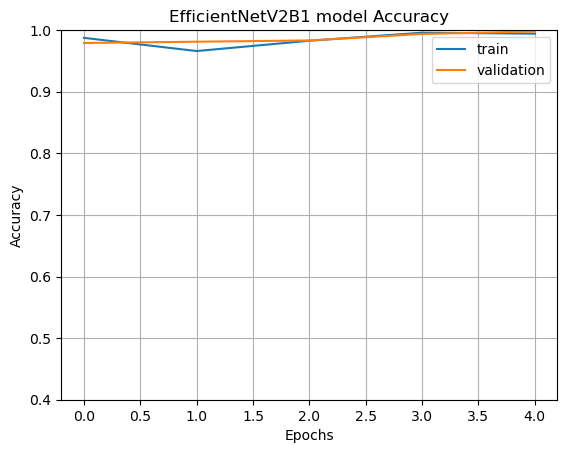

In [12]:
plot_accuracy(EfficientNetV2B1_model_hist, "EfficientNetV2B1 model")

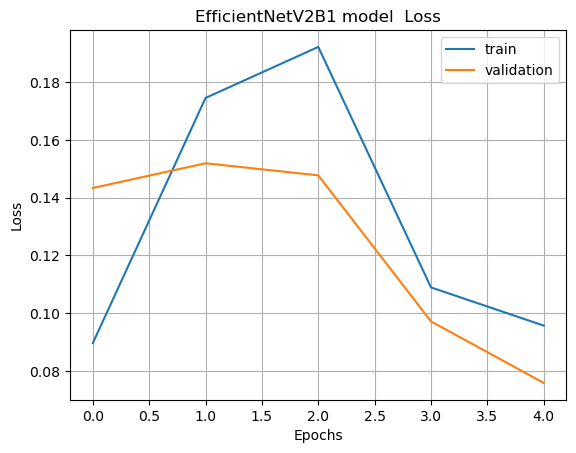

In [13]:
plot_loss(EfficientNetV2B1_model_hist, "EfficientNetV2B1 model")

1/1 [==============================] - 0s 175ms/step


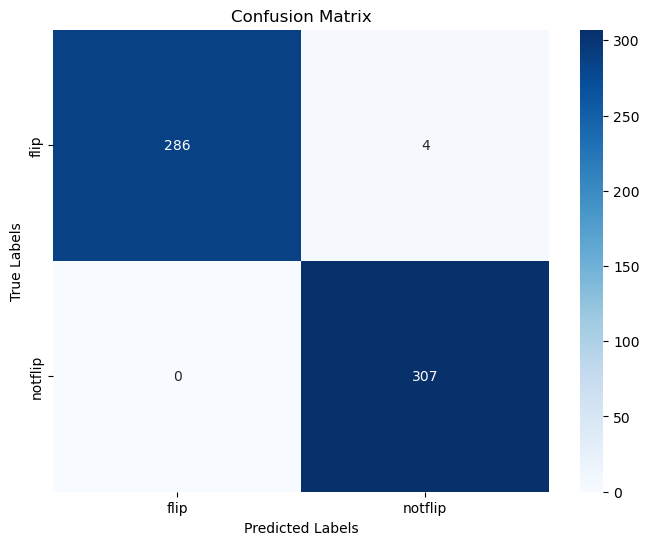

{'accuracy': 0.9932998324958124, 'f1_score': 0.9935275080906149}

In [15]:
evaluate_model(EfficientNetV2B1_model, test_data)

In [16]:
EfficientNetV2B1_model_path = '../models/EfficientNetV2B1_model.h5'
EfficientNetV2B1_model.save(EfficientNetV2B1_model_path)
EfficientNetV2B1_model_size = os.path.getsize(EfficientNetV2B1_model_path) / (1024 * 1024)
print('Model size: ', EfficientNetV2B1_model_size, 'MB')

Model size:  35.445518493652344 MB
